# Chapter 5.2 - Clustering

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import cluster, datasets
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse 

import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set the number of threads to avoid memory leak using KML

import warnings
warnings.filterwarnings("ignore")

## K-Means

Suppose we have a data set 𝑋 = {𝑥1, · · · , 𝑥𝑁} that consists of 𝑁 observations of a random 𝐷-dimensional Euclidean variable 𝑥. Our goal is to partition the data set into some number, 𝐾, of clusters, where we shall suppose for the moment that the value of 𝐾 is given. Intuitively, we
might think of a cluster as comprising a group of data points whose inter-point distances are small compared to the distances to points outside of the cluster. We can formalize this notion by first introducing a set of 𝐷-dimensional vectors 𝜇𝑘, where 𝑘 = 1, . . . , 𝐾, in which 𝜇𝑘 is a
**prototype** associated with the 𝑘𝑡ℎ cluster. As we shall see shortly, we can think of the 𝜇𝑘 as representing the centres of the clusters. Our goal is then to find an assignment of data points to clusters, as well as a set of vectors {𝜇𝑘}, such that the sum of the squares of the distances of
each data point to its closest prototype vector 𝜇𝑘, is at a minimum.

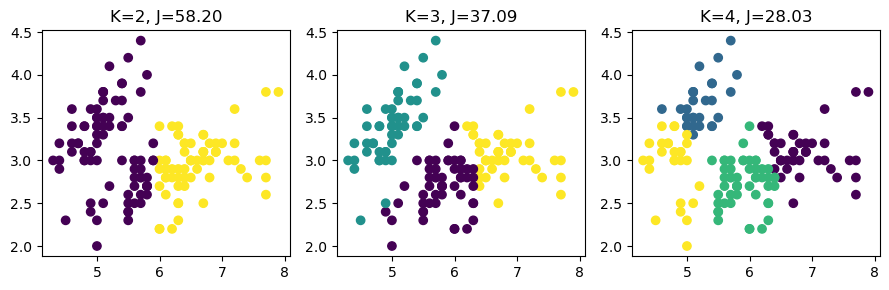

In [5]:
from sklearn import datasets     # Import datasets from sklearn
from sklearn import cluster      # Import clustering methods
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the iris dataset
iris = datasets.load_iris()      # Load the iris dataset
X = iris.data[:, :2]             # Use only 'sepal length' and 'sepal width' features
y_iris = iris.target             # Extract target labels

# Fit KMeans clustering with different numbers of clusters
km2 = cluster.KMeans(n_clusters=2).fit(X)     # KMeans with 2 clusters
km3 = cluster.KMeans(n_clusters=3).fit(X)     # KMeans with 3 clusters
km4 = cluster.KMeans(n_clusters=4).fit(X)     # KMeans with 4 clusters

# Create subplots for each KMeans result
plt.figure(figsize=(9, 3))                    # Set figure size

plt.subplot(131)  # First subplot for K=2
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)  # Scatter plot with K=2 labels
plt.title("K=2, J=%.2f" % km2.inertia_)       # Show inertia (sum of squared distances)

plt.subplot(132)  # Second subplot for K=3
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)  # Scatter plot with K=3 labels
plt.title("K=3, J=%.2f" % km3.inertia_)       # Show inertia

plt.subplot(133)  # Third subplot for K=4
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)  # Scatter plot with K=4 labels
plt.title("K=4, J=%.2f" % km4.inertia_)       # Show inertia

plt.tight_layout()  # Adjust layout for better spacing
plt.show()          # Display the plots

The result `Text(0.5, 1.0, 'K=4, J=28.41')` is related to the title of the third subplot in your KMeans clustering visualization.

`K=4`: This indicates that the clustering algorithm (KMeans) has been applied with 4 clusters

`J=28.41`: This value represents the inertia of the KMeans model with 4 clusters. Inertia is a measure of how tightly the clusters are packed. It is defined as the sum of squared distances between each point and its assigned cluster centroid. Lower values of inertia indicate better clustering (points are closer to their centroids).

## Gaussian Mixture Models

The Gaussian mixture model (GMM) is a simple linear superposition of Gaussian components over the data, aimed at providing a rich class of density models. We turn to a formulation of Gaussian mixtures in terms of discrete latent variables: the 𝐾 hidden classes to be discovered.
Differences compared to 𝐾-means:

    • Whereas the 𝐾-means algorithm performs a hard assignment of data points to clusters, in which each data point is associated uniquely with one cluster, the GMM algorithm makes a soft assignment based on posterior probabilities.

    • Whereas the classic 𝐾-means is only based on Euclidean distances, classic GMM use a Mahalanobis distances that can deal with non-spherical distributions. It should be noted that Mahalanobis could be plugged within an improved version of 𝐾-Means clustering. The Mahalanobis distance is unitless and scale-invariant, and takes into account the correlations of the data set.

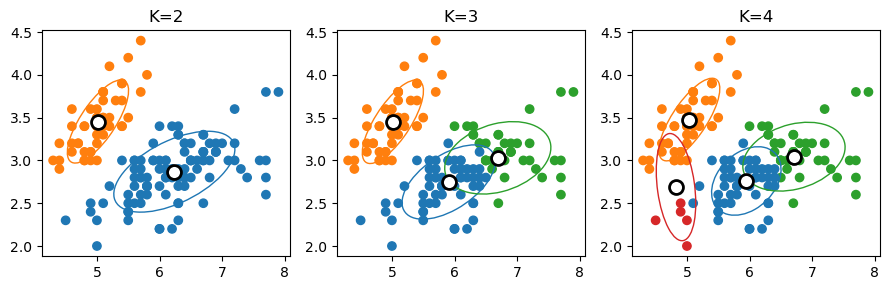

In [8]:
# Set up the color palette for plotting
colors = sns.color_palette()

# Load the iris dataset
iris = datasets.load_iris()  # Load the iris dataset
X = iris.data[:, :2]         # Use 'sepal length (cm)' and 'sepal width (cm)' features
y_iris = iris.target         # Extract target labels

# Fit Gaussian Mixture Models with different numbers of components
gmm2 = GaussianMixture(n_components=2, covariance_type='full').fit(X)  # GMM with 2 clusters
gmm3 = GaussianMixture(n_components=3, covariance_type='full').fit(X)  # GMM with 3 clusters
gmm4 = GaussianMixture(n_components=4, covariance_type='full').fit(X)  # GMM with 4 clusters

# Create subplots for visualizing the results
plt.figure(figsize=(9, 3))  # Set figure size

# Function to plot covariance ellipses
def plot_cov_ellipse(cov, pos, ax, color):
    """Plot a covariance ellipse."""
    v, w = np.linalg.eigh(cov)       # Perform eigenvalue decomposition of the covariance matrix
    u = w[0] / np.linalg.norm(w[0])  # Normalize the eigenvector for direction
    angle = np.arctan2(u[1], u[0])   # Calculate the angle of the ellipse
    angle = np.degrees(angle)        # Convert angle to degrees
    width, height = 2 * np.sqrt(2) * np.sqrt(v)  # Width and height of the ellipse based on eigenvalues
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=angle, color=color, fill=False)  # Create ellipse
    ax.add_patch(ellipse)  # Add ellipse to the axis

# Plot for K=2
plt.subplot(131)  # First subplot for K=2
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm2.predict(X)])  # Scatter plot colored by clusters
for i in range(gmm2.covariances_.shape[0]):                                # Iterate over the number of components
    plot_cov_ellipse(gmm2.covariances_[i], gmm2.means_[i], plt.gca(), colors[i])                                         # Plot ellipses
plt.scatter(gmm2.means_[:, 0], gmm2.means_[:, 1], edgecolor='black', marker="o", s=100, facecolor="white", linewidth=2)  # Plot means
plt.title("K=2")  # Set title for the subplot

# Plot for K=3
plt.subplot(132)  # Second subplot for K=3
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm3.predict(X)])  # Scatter plot
for i in range(gmm3.covariances_.shape[0]):                                # Iterate over the number of components
    plot_cov_ellipse(gmm3.covariances_[i], gmm3.means_[i], plt.gca(), colors[i])                                         # Plot ellipses
plt.scatter(gmm3.means_[:, 0], gmm3.means_[:, 1], edgecolor='black', marker="o", s=100, facecolor="white", linewidth=2)  # Plot means
plt.title("K=3")  # Set title for the subplot

# Plot for K=4
plt.subplot(133)  # Third subplot for K=4
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm4.predict(X)])  # Scatter plot
for i in range(gmm4.covariances_.shape[0]):                                # Iterate over the number of components
    plot_cov_ellipse(gmm4.covariances_[i], gmm4.means_[i], plt.gca(), colors[i])                                         # Plot ellipses
plt.scatter(gmm4.means_[:, 0], gmm4.means_[:, 1], edgecolor='black', marker="o", s=100, facecolor="white", linewidth=2)  # Plot means
plt.title("K=4")  # Set title for the subplot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()          # Display the plots

#### Gaussian Mixture Model (GMM)
GMM is a probabilistic model that assumes that the data points are generated from a mixture of several Gaussian distributions, each with its own mean and covariance. GMM can be used for clustering because each Gaussian represents a cluster, and GMM assigns probabilities to points based on the likelihood they belong to each cluster.

# Model Selection

### Bayesian Information Criterion (BIC)

In statistics, the Bayesian information criterion (BIC) is a criterion for model selection amonga finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the
likelihood function and it is closely related to the Akaike information criterion (AIC).

In [13]:
# Load the iris dataset
iris = load_iris()           # Load the iris dataset into a variable
X = iris.data                # Extract feature data
y = iris.target              # Extract target labels
species = iris.target_names  # Extract species names

# Create a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)  # Create a DataFrame with feature names as columns
df['species'] = [species[i] for i in y]           # Add species as a new column based on target labels

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Check unique species
unique_species = df['species'].unique()                  # Get unique species
print("Unique species:", unique_species)                 # Print unique species
print("Number of unique species:", len(unique_species))  # Print the number of unique species

Unique species: ['setosa' 'versicolor' 'virginica']
Number of unique species: 3


Choose k= 2


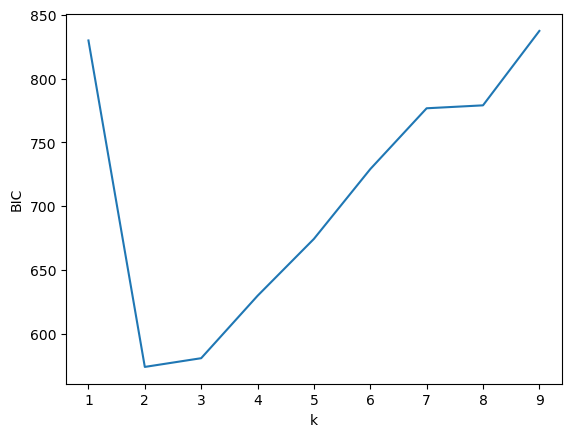

In [15]:
# Initialize an empty list to store BIC values
bic = list()

# Define a range of components to test
ks = np.arange(1, 10)  # Array of component counts from 1 to 9

# Loop through each value of k in the range
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full')  # Initialize GMM with k components
    gmm.fit(X)                                                     # Fit the GMM to the data
    bic.append(gmm.bic(X))                                         # Calculate and store the BIC for the fitted model

# Determine the number of components that minimizes the BIC
k_chosen = ks[np.argmin(bic)]  # Get the k value corresponding to the minimum BIC

# Plot the BIC values against the number of components
plt.plot(ks, bic)  # Create a line plot of BIC values
plt.xlabel("k")    # Set the x-axis label
plt.ylabel("BIC")  # Set the y-axis label

# Print the chosen number of components
print("Choose k=", k_chosen)   # Output the optimal k value

#### Bayesian Information Criterion (BIC)
The BIC is used for model selection. It balances the goodness of fit of the model with its complexity by penalizing models with more parameters. The goal is to avoid overfitting.

Formula:

    BIC = −2 ln(L) + p ln(N)

Where:

    L is the likelihood of the model.

    p is the number of parameters in the model (which increases with more components 

    N is the number of data points.

Lower BIC values indicate better models, as they provide a better balance between model complexity and fit.

## Hierarchical Clustering

Hierarchical clustering is an approach to clustering that build hierarchies of clusters in two main
approaches:

    • Agglomerative: A bottom-up strategy, where each observation starts in their own cluster, and pairs of clusters are merged upwards in the hierarchy.
    
    • Divisive: A top-down strategy, where all observations start out in the same cluster, and then the clusters are split recursively downwards in the hierarchy.

In order to decide which clusters to merge or to split, a measure of dissimilarity between clusters is introduced. More specific, this comprise a distance measure and a linkage criterion. The distance measure is just what it sounds like, and the linkage criterion is essentially a function of
the distances between points, for instance the minimum distance between points in two clusters, the maximum distance between points in two clusters, the average distance between points in two clusters, etc. 

### Ward clustering
Ward clustering belongs to the family of agglomerative hierarchical clustering algorithms. This means that they are based on a “bottoms up” approach: each sample starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

In Ward clustering, the criterion for choosing the pair of clusters to merge at each step is the minimum variance criterion. Ward’s minimum variance criterion minimizes the total within-cluster variance by each merge. To implement this method, at each step: find the pair of clusters that leads to minimum increase in total within-cluster variance after merging. This increase is a weighted squared distance between cluster centers.

The main advantage of agglomerative hierarchical clustering over 𝐾-means clustering is that you can benefit from known neighborhood information, for example, neighboring pixels in an image.

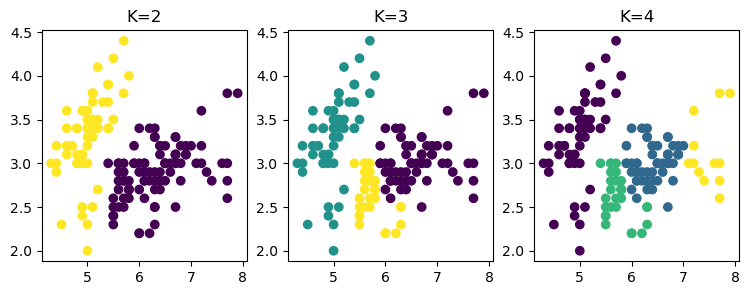

In [20]:
# Load the iris dataset
iris = datasets.load_iris()  # Load the iris dataset
X = iris.data[:, :2]         # Use 'sepal length (cm)' and 'sepal width (cm)' features for clustering
y_iris = iris.target         # Extract target labels

# Perform Agglomerative Clustering with Ward linkage for 2, 3, and 4 clusters
ward2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)  # Clustering with 2 clusters
ward3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)  # Clustering with 3 clusters
ward4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)  # Clustering with 4 clusters

# Create subplots for visualizing the results
plt.figure(figsize=(9, 3))                      # Set figure size

# Plot the clustering results for K=2
plt.subplot(131)                                # First subplot for K=2
plt.scatter(X[:, 0], X[:, 1], c=ward2.labels_)  # Scatter plot with cluster labels for K=2
plt.title("K=2")                                # Set title for K=2 plot

# Plot the clustering results for K=3
plt.subplot(132)                                # Second subplot for K=3
plt.scatter(X[:, 0], X[:, 1], c=ward3.labels_)  # Scatter plot with cluster labels for K=3
plt.title("K=3")                                # Set title for K=3 plot

# Plot the clustering results for K=4
plt.subplot(133)                                # Third subplot for K=4
plt.scatter(X[:, 0], X[:, 1], c=ward4.labels_)  # Scatter plot with cluster labels for K=4
plt.title("K=4")                                # Set title for K=4 plot

# Show the plots
plt.show()  # Display the plots

## Exercises

Perform clustering of the iris dataset based on all variables using Gaussian mixture models. Use
PCA to visualize clusters.

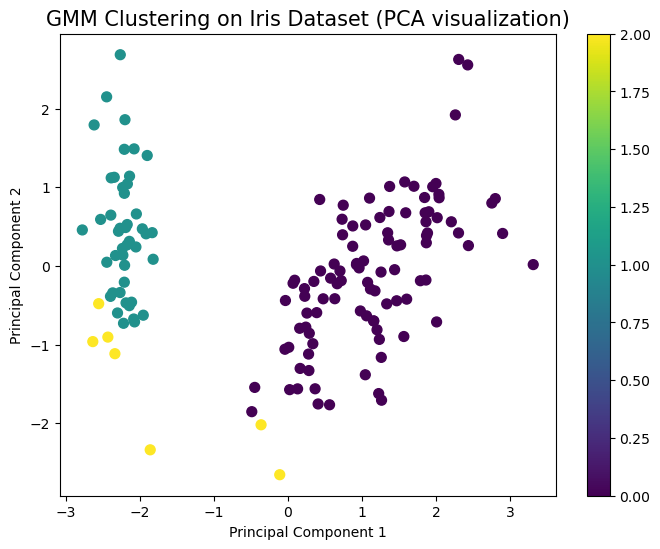

In [23]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()  # Load the iris dataset
X = iris.data                # Use all four features for clustering
y_iris = iris.target         # Extract target labels

# Standardize the data
scaler = StandardScaler()           # Initialize the scaler
X_scaled = scaler.fit_transform(X)  # Scale the data

# Fit Gaussian Mixture Model (GMM) with 3 components (since Iris dataset has 3 species)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42).fit(X_scaled)  # Fit GMM

# Predict cluster labels
gmm_labels = gmm.predict(X_scaled)  # Predict the cluster labels using the GMM model

# Perform PCA to reduce dimensionality for visualization (2D)
pca = PCA(n_components=2)            # Initialize PCA with 2 components
X_pca = pca.fit_transform(X_scaled)  # Fit and transform the data using PCA

# Plot the PCA components with the cluster labels
plt.figure(figsize=(8, 6))                                                    # Set figure size
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)     # Scatter plot with cluster labels
plt.title("GMM Clustering on Iris Dataset (PCA visualization)", fontsize=15)  # Set plot title
plt.xlabel("Principal Component 1")  # Label for x-axis
plt.ylabel("Principal Component 2")  # Label for y-axis
plt.colorbar()                       # Add colorbar to show the cluster labels
plt.show()                           # Display the plot

#### Steps Explained:

* `Standardize the dataset`: The features are standardized to have zero mean and unit variance, which is important for GMM and PCA.

* `Fit Gaussian Mixture Model (GMM)`: A GMM with 3 components is used to cluster the data, as the Iris dataset has 3 species.

* `Perform PCA`: PCA is applied to reduce the dimensionality of the data to 2 components, allowing us to visualize the clusters.

* `Plot the clusters`: The clusters are plotted based on the first two principal components, with colors indicating different clusters predicted by the GMM.

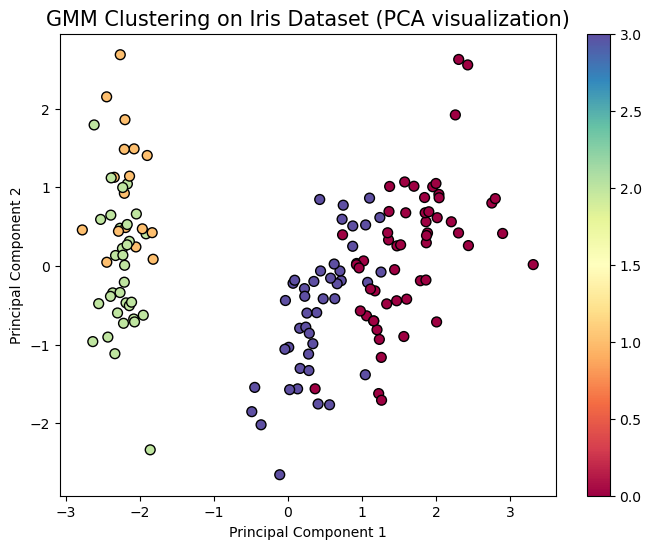

In [25]:
# Fit Gaussian Mixture Model (GMM) with 4 components (checking for 4 species)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42).fit(X_scaled)  # Fit GMM

# Predict cluster labels
gmm_labels = gmm.predict(X_scaled)  # Predict the cluster labels using the GMM model

# Perform PCA to reduce dimensionality for visualization (2D)
pca = PCA(n_components=2)            # Initialize PCA with 2 components
X_pca = pca.fit_transform(X_scaled)  # Fit and transform the data using PCA

# Plot the PCA components with the cluster labels
plt.figure(figsize=(8, 6))                                                    # Set figure size
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Spectral', edgecolor='black', s=50)     # Scatter plot with cluster labels
plt.title("GMM Clustering on Iris Dataset (PCA visualization)", fontsize=15)  # Set plot title
plt.xlabel("Principal Component 1")  # Label for x-axis
plt.ylabel("Principal Component 2")  # Label for y-axis
plt.colorbar()                       # Add colorbar to show the cluster labels
plt.show()                           # Display the plot